# Low Sample-Size Problem

This notebook aims to illustrate the so-called **"Low Sample-Size Problem"** i.e. where the number of dimensions is larger than number of samples. For this purpose we use [ORL Face Dataset](https://www.cl.cam.ac.uk/research/dtg/attarchive/facesataglance.html) from [AT&T Laboratories Cambridge](https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html), generously provided by **Ferdinando Samaria** and **Andy Harter** ([see here](https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html)). Some description can be also found in [SKlearn Documentation](http://scikit-learn.org/stable/datasets/#the-olivetti-faces-dataset).

The dataset consists of 400 images of 40 people, 10 image per each person. Each image is a simple gray-scale image of size $92\times112(=10304)$, thus the data contains $400$ points in $10304$ dimenional space! For sake of computation time, we resize images by a factor of $0.25$ (i.e. each image will be a point in $28\times23=644$ dimensional space). Gray-levels are encoded from $0$ (black) to $255$ (white).

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import eigh
from skimage.transform import resize
import warnings
warnings.filterwarnings("ignore")

Now we read the images. Images will be flattened into a 1d array of size 644 and placed on each other. At the end each row of the matrix *data* is an image of a person and columns are pixels of that image, read row-by-row.

For sake of data overview, we also show one image per person.

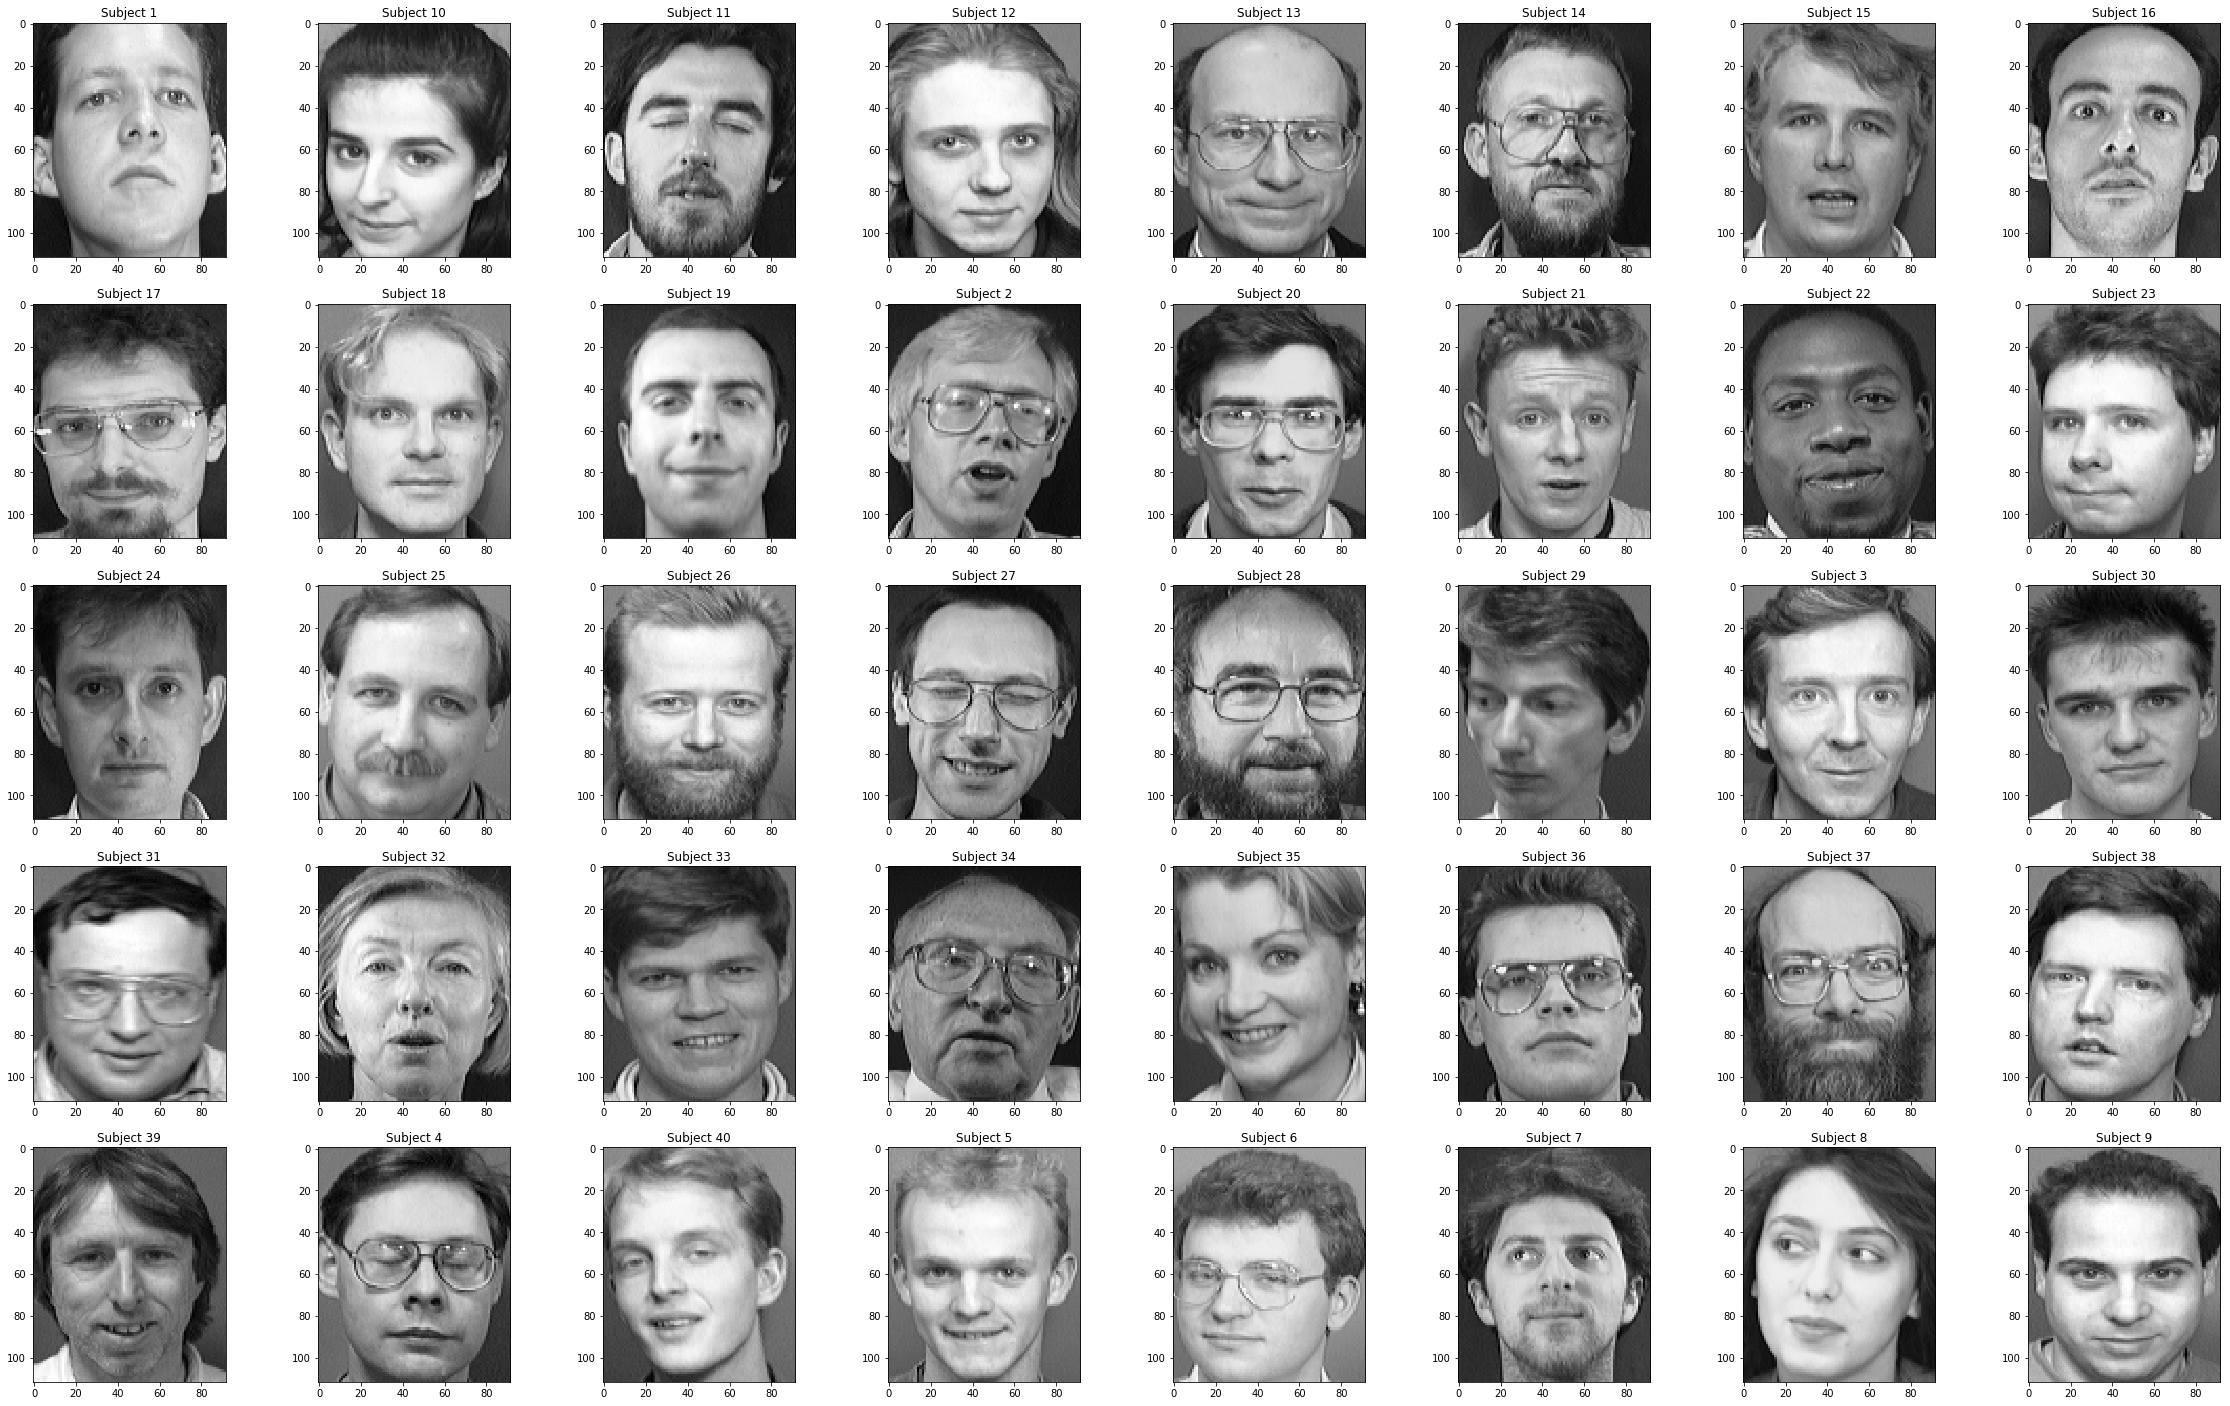

In [23]:
data = np.empty((0,644), int)
tags = []
ii = 1
plt.figure(figsize=(40,25))
for folder in os.listdir('orl_faces/'):
    if folder != 'README':
        for im in os.listdir('orl_faces/'+folder):
            tags.append(folder)
            img = plt.imread('orl_faces/'+folder+'/'+im)
            img = resize(img,(112/4,92/4)).flatten().reshape(1,644) # Let's make images small!
            data = np.append(data, img, axis=0)
        plt.subplot(5,8,ii)
        plt.imshow(plt.imread('orl_faces/'+folder+'/'+im),cmap='gray') # show 1 sample from each subject
        plt.title('Subject '+ folder[1::])
        ii += 1
plt.show()

First, we'll have an insight to the range of images. Then we "zero-mean" the data i.e. we will subtract the **mean image** from all images where *mean image* is simply an image whose pixel $(i,j)$ is the mean of all images at pixel $(i,j)$.

In [7]:
print('min and max of data are:', (np.min(data),np.max(data)))

min and max of data are: (0.03333333333333333, 0.9049019607843141)


There is no complete white in any of images. The contrast of a gray-scale image is adjusted (increased) by scaling it to (0,255), however, here the adjustment will not be that effective (only 4 gray-levels) and is not the topic of current task!

Let's compute the mean image and also visualize it:

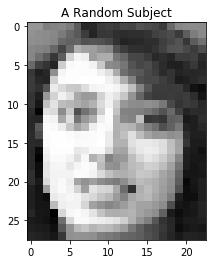

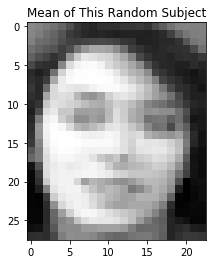

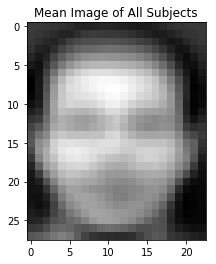

In [11]:
random_subject = np.random.randint(40)*10
mean_img = np.mean(data[random_subject:random_subject+9,:],axis=0)
plt.figure()
plt.imshow(data[random_subject,:].reshape(28,23),cmap='gray')
plt.title('A Random Subject')
plt.figure()
plt.imshow(mean_img.reshape(28,23),cmap='gray')
plt.title('Mean of This Random Subject')
plt.figure()
mean_img = np.mean(data,axis=0)
plt.imshow(mean_img.reshape(28,23),cmap='gray')
plt.title('Mean Image of All Subjects')
plt.show()

Now we subtract this mean image from all. This translation, drags the cloud of 400 points in a way that their mean is placed on the origin of 10304 dimensional space.

In [12]:
zero_mean_data = data - mean_img
print('Shape of data does not change',zero_mean_data.shape,', but the new mean of data is ',np.mean(zero_mean_data))

Shape of data does not change (400, 644) , but the new mean of data is  2.0797718274965664e-17


The covariance of this centered data illustrates the information of each pixel. How many pixels are informative according to the lecture?!!!

In [13]:
CoV = zero_mean_data.T.dot(zero_mean_data) # How did we compute covariance matrix here? Google it!
CoV.shape

(644, 644)

In [14]:
from scipy.linalg import eigh

vals,vecs = eigh(CoV)

In [15]:
nonzeros = vals>0.00001
nonzeros.sum()

399

Now let's try the same without centering the data. **How many informative pixel do you expect to find and why?!!**

In [16]:
CoV_orig = data.T.dot(data)
CoV_orig.shape


(644, 644)

In [17]:
vals_orig,vecs_orig = eigh(CoV_orig)

In [18]:
nonzeros_orig = vals_orig > 0.0001
nonzeros_orig.sum()

400

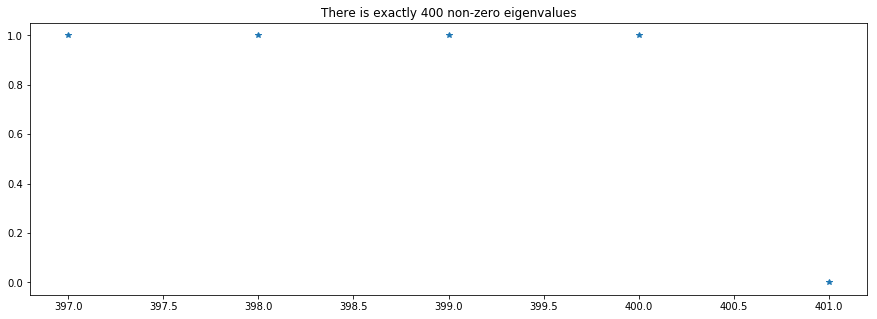

In [22]:
plt.figure(figsize=(15,5))
plt.plot([397, 398, 399, 400, 401],sorted(nonzeros_orig,reverse=True)[396:401],'*')
plt.title('There is exactly 400 non-zero eigenvalues')
plt.show()

# Explanation (not included in the lecture!)

The process of centering data reduces the number of needed dimensions by 1 as the most trivial dimension is the distance of data mean to the origin.

An exaggerated example of this is 1 point in 2-d.

This point needs only a 1-d manifold to be modeled and on that 1-d manifold the value of the point is its distance to the origin. If we reduce the mean of this data from it (mean of a number is itself) then we hav actually just a number $0$ which conceptually does not need any dimension to be modeled! (More precisely whole data is just an origin of a 1-d space which is a point i.e. 0-d manifold)